This excersise has the objective to teach webscraping with beautifull soup using CSS Selectrors. And build a random shuffled manual song recommender by else if with user input.

## https://www.billboard.com/charts/hot-100/ 100 top songs scraping

Go to https://www.billboard.com/charts/hot-100/ vand extract the top 100 billboard charts by artist and song

The objective is to extract the top 100 billboard chart artist with songs.
The task description can be found here:
https://docs.google.com/presentation/d/1l_yq7e0n13qONhLhr43sTCznWxP05C9u/edit#slide=id.gce2873134e_0_0

In [2]:
# 1. import libraries
from bs4 import BeautifulSoup
import requests
import pandas as pd 

In [3]:
# 2. url: we start with the 'second' page
url = "https://www.billboard.com/charts/hot-100/"

In [4]:
# 3. download html with a get request
response = requests.get(url)
response.status_code # 200 status code means OK!

200

<!DOCTYPE html>

<!--[if IE 6]>
<html id="ie6" lang="en-US">
<![endif]-->
<!--[if IE 7]>
<html id="ie7" lang="en-US">
<![endif]-->
<!--[if IE 8]>
<html id="ie8" lang="en-US">
<![endif]-->
<!--[if !(IE 6) | !(IE 7) | !(IE 8) ]><!-->
<html lang="en-US">
<!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1.0" name="viewport">
<!-- Add to home screen for iOS -->
<meta content="black-translucent" name="apple-mobile-web-app-status-bar-style"/>
<link href="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/icons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
<!-- Tile icons for Windows -->
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-billboard-2021/assets/app/browserconfig.xml" name="msapplication-config"/>
<meta content="https://www.billboard.com/wp-content/themes/vip/pmc-bil
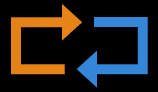

In [5]:
# 4.1. parse html (create the 'soup')
soup = BeautifulSoup(response.content, "html.parser")
# 4.2. check that the html code looks like it should
soup

It's the moment to build the code that collects all the 100 song titles and artists in a dataframe.

In [7]:
songname_list = []
artist_list= []
r = requests.get('https://www.billboard.com/charts/hot-100/')
soup = BeautifulSoup(r.content, 'html.parser')
result = soup.find_all('div', class_='o-chart-results-list-row-container')
for res in result:
    song = res.find('h3').text.strip()
    artist = res.find('h3').find_next('span').text.strip()
    songname_list.append(song)
    artist_list.append(artist)
    print("song: "+song)
    print("artist: "+ str(artist))
    print("___________________________________________________")

song: As It Was
artist: Harry Styles
___________________________________________________
song: Bad Habit
artist: Steve Lacy
___________________________________________________
song: Late Night Talking
artist: Harry Styles
___________________________________________________
song: Sunroof
artist: Nicky Youre & dazy
___________________________________________________
song: About Damn Time
artist: Lizzo
___________________________________________________
song: I Like You (A Happier Song)
artist: Post Malone Featuring Doja Cat
___________________________________________________
song: Super Freaky Girl
artist: Nicki Minaj
___________________________________________________
song: I Ain't Worried
artist: OneRepublic
___________________________________________________
song: Running Up That Hill (A Deal With God)
artist: Kate Bush
___________________________________________________
song: You Proof
artist: Morgan Wallen
___________________________________________________
song: Wait For U
artist: 

In [10]:
import difflib
difflib.get_close_matches(costumer, df["song"])
4:18
costumer = input("select your song or your artist: “)
if costumer in list(df["song"]):
    computer = random.choice(df["song"])
    print(‘Recommendation:’,computer)
elif difflib.get_close_matches(costumer, df["song"]):
    computer = random.choice(df["song"])
    print(‘do you mean’,difflib.get_close_matches(costumer, df["song"]))
    customer2=input()
    if customer2 == ‘yes’:
        print(‘Recommendation:’,computer)
    elif customer2 == ‘no’:
        print(‘Unfortunately, the song is not in the hot list!’)
    else:
        print(‘please select yes or no:’)
        customer2=input()
else:
    print(‘Unfortunately, the song is not in the hot list!’)

SyntaxError: EOL while scanning string literal (1611718940.py, line 4)